In [1]:
using Distributions, Mamba, Stan, Gadfly;

INFO: Recompiling stale cache file /Users/juanpablodonosomerlet/.julia/lib/v0.6/CodecZlib.ji for module CodecZlib.
INFO: Recompiling stale cache file /Users/juanpablodonosomerlet/.julia/lib/v0.6/DataFrames.ji for module DataFrames.
INFO: Recompiling stale cache file /Users/juanpablodonosomerlet/.julia/lib/v0.6/Gadfly.ji for module Gadfly.
INFO: Recompiling stale cache file /Users/juanpablodonosomerlet/.julia/lib/v0.6/LightGraphs.ji for module LightGraphs.
INFO: Recompiling stale cache file /Users/juanpablodonosomerlet/.julia/lib/v0.6/Documenter.ji for module Documenter.


In [2]:
srand(123);
N_max = 100;
alpha = ones(7);

# generar vector aleatorio p
dirichlet = Dirichlet(alpha);
p = rand(dirichlet);

# generara calidades de los alumnos en
# diccionario con keyword N in {1..N}
calidades_sample = Dict(string(i) => rand(Multinomial(i,p)) for i = 10:10:N_max);

In [3]:
# Stan style
alpha = ones(7);
tmp = "/Users/juanpablodonosomerlet/Desktop/IOperaciones/Tareas/Tarea2/notebook/tmp/";
const MultinomialBayesian = "
data{
    int<lower=0> N;
    int <lower=0,upper=N> q[7];
    vector[7] alpha;
}
parameters{
    simplex[7] p;
}
model{
    p ~ dirichlet(alpha);
    q ~ multinomial(p); 
}
";
stanmodel = Stanmodel(name = "posterior_model", model = MultinomialBayesian);
const MultinomialData = Dict("N" => N_max, "q" => calidades_sample[string(N_max)], "alpha" => alpha);


File /Users/juanpablodonosomerlet/Desktop/IOperaciones/Tareas/Tarea2/notebook/tmp/posterior_model.stan will be updated.



In [4]:
# se crea un dicc con cada simulacion para todos los N's
dicc_sim = Dict();
for i in 10:10:N_max
    const MultinomialData = Dict("N" => i, "q" => calidades_sample[string(i)], "alpha" => alpha);
    _,sim_i = stan(stanmodel, [MultinomialData], tmp, CmdStanDir=CMDSTAN_HOME);
    dicc_sim[string(i)] = sim_i;
end



--- Translating Stan model to C++ code ---
bin/stanc  /Users/juanpablodonosomerlet/Desktop/IOperaciones/Tareas/Tarea2/notebook/tmp/posterior_model.stan --o=/Users/juanpablodonosomerlet/Desktop/IOperaciones/Tareas/Tarea2/notebook/tmp/posterior_model.hpp
Model name=posterior_model_model
Input file=/Users/juanpablodonosomerlet/Desktop/IOperaciones/Tareas/Tarea2/notebook/tmp/posterior_model.stan
Output file=/Users/juanpablodonosomerlet/Desktop/IOperaciones/Tareas/Tarea2/notebook/tmp/posterior_model.hpp

--- Linking C++ model ---
c++ -Wall -I . -isystem stan/lib/stan_math/lib/eigen_3.3.3 -isystem stan/lib/stan_math/lib/boost_1.66.0 -isystem stan/lib/stan_math/lib/cvodes-3.1.0/include -std=c++1y -DBOOST_RESULT_OF_USE_TR1 -DBOOST_NO_DECLTYPE -DBOOST_DISABLE_ASSERTS -DBOOST_PHOENIX_NO_VARIADIC_EXPRESSION -Wno-unused-function -Wno-uninitialized -I src -isystem stan/src -isystem stan/lib/stan_math/ -DFUSION_MAX_VECTOR_SIZE=12 -Wno-unused-local-typedefs -DEIGEN_NO_DEBUG -DNO_FPRINTF_OUTPUT -pip

make: `/Users/juanpablodonosomerlet/Desktop/IOperaciones/Tareas/Tarea2/notebook/tmp/posterior_model' is up to date.

Length of data array is not equal to nchains,
all chains will use the first data dictionary.

Calling /Users/juanpablodonosomerlet/Desktop/cmdstan/bin/stansummary to infer across chains.

Inference for Stan model: posterior_model_model
4 chains: each with iter=(1000,1000,1000,1000); warmup=(0,0,0,0); thin=(1,1,1,1); 4000 iterations saved.

Warmup took (0.10, 0.10, 0.11, 0.10) seconds, 0.42 seconds total
Sampling took (0.13, 0.13, 0.13, 0.12) seconds, 0.51 seconds total

                 Mean     MCSE  StdDev     5%    50%   95%    N_Eff  N_Eff/s    R_hat
lp__             -105  4.3e-02     1.8   -108   -104  -103  1.7e+03  3.4e+03  1.0e+00
accept_stat__    0.90  1.5e-03    0.11   0.68   0.94   1.0  5.1e+03  1.0e+04  1.0e+00
stepsize__       0.69  9.6e-03   0.014   0.67   0.70  0.71  2.0e+00  3.9e+00  1.1e+13
treedepth__       2.7  8.0e-03    0.48    2.0    3.0   3.0  3.6e

make: `/Users/juanpablodonosomerlet/Desktop/IOperaciones/Tareas/Tarea2/notebook/tmp/posterior_model' is up to date.

Length of data array is not equal to nchains,
all chains will use the first data dictionary.

Calling /Users/juanpablodonosomerlet/Desktop/cmdstan/bin/stansummary to infer across chains.

Inference for Stan model: posterior_model_model
4 chains: each with iter=(1000,1000,1000,1000); warmup=(0,0,0,0); thin=(1,1,1,1); 4000 iterations saved.

Warmup took (0.11, 0.11, 0.11, 0.12) seconds, 0.45 seconds total
Sampling took (0.14, 0.13, 0.13, 0.13) seconds, 0.52 seconds total

                 Mean     MCSE  StdDev        5%    50%    95%    N_Eff  N_Eff/s    R_hat
lp__             -173  4.2e-02     1.8  -1.8e+02   -173   -171  1.8e+03  3.4e+03  1.0e+00
accept_stat__    0.90  1.5e-03    0.11   6.8e-01   0.94    1.0  5.3e+03  1.0e+04  1.0e+00
stepsize__       0.71  2.4e-02   0.033   6.8e-01   0.74   0.75  2.0e+00  3.8e+00  2.6e+13
treedepth__       2.7  8.7e-03    0.52   2.0e+00

In [12]:
print(CMDSTAN_HOME)

/Users/juanpablodonosomerlet/Desktop/cmdstan

In [201]:
_, sim1 = stan(stanmodel, [MultinomialData], tmp, CmdStanDir=CMDSTAN_HOME);


make: `/Users/juanpablodonosomerlet/Desktop/cmdstan/tmp/posterior_model' is up to date.

Length of data array is not equal to nchains,
all chains will use the first data dictionary.

Calling /Users/juanpablodonosomerlet/Desktop/cmdstan/bin/stansummary to infer across chains.

Inference for Stan model: posterior_model_model
4 chains: each with iter=(1000,1000,1000,1000); warmup=(0,0,0,0); thin=(1,1,1,1); 4000 iterations saved.

Warmup took (0.12, 0.12, 0.12, 0.11) seconds, 0.46 seconds total
Sampling took (0.14, 0.13, 0.14, 0.14) seconds, 0.54 seconds total

                    Mean     MCSE   StdDev        5%       50%    95%    N_Eff  N_Eff/s    R_hat
lp__            -1.7e+02  4.6e-02  1.8e+00  -1.8e+02  -1.7e+02   -172  1.5e+03  2.9e+03  1.0e+00
accept_stat__    9.1e-01  6.1e-03  1.2e-01   6.9e-01   9.5e-01    1.0  3.6e+02  6.6e+02  1.0e+00
stepsize__       6.2e-01  4.6e-02  6.5e-02   5.7e-01   6.0e-01   0.73  2.0e+00  3.7e+00  8.0e+13
treedepth__      2.8e+00  2.0e-02  4.1e-01   2.

In [267]:
# imprimir detalles de la simulacion
describe(sim1)

# se obtiene la simulacion de los parametros de interes
nombres_param = ["p.1", "p.2", "p.3", "p.4", "p.5", "p.6", "p.7"];
sim = sim1[:, nombres_param, :];

# graficar
p = plot(sim, [:mean, :density], legend=true)
draw(p[1,4:7],nrow = 2, ncol = 2, filename="promedios",fmt=:png)

Iterations = 1:1000
Thinning interval = 1
Chains = 1,2,3,4
Samples per chain = 1000

Empirical Posterior Estimates:
                   Mean           SD        Naive SE        MCSE         ESS    
         lp__ -174.493846750 1.792599626 0.02834348875 0.04663717668 1000.000000
accept_stat__    0.907502913 0.116135480 0.00183626317 0.00360592577 1000.000000
   stepsize__    0.617642000 0.064793983 0.00102448282 0.01037404383   39.009752
  treedepth__    2.786250000 0.410613064 0.00649236260 0.01252017602 1000.000000
 n_leapfrog__    6.461000000 1.365263706 0.02158671458 0.04508083907  917.168454
  divergent__    0.000000000 0.000000000 0.00000000000 0.00000000000         NaN
     energy__  177.491023750 2.522731536 0.03988788789 0.06718082327 1000.000000
          p.1    0.131652092 0.032133004 0.00050806740 0.00038712802 1000.000000
          p.2    0.430172222 0.046992367 0.00074301457 0.00067161648 1000.000000
          p.3    0.167771599 0.035093131 0.00055487113 0.00038962630 1000.

In [5]:
# contatenar cadanas y plotear la convergencia de cada simulacion
nombres_param = ["p.1", "p.2", "p.3", "p.4", "p.5", "p.6", "p.7"];
cadena_1 = dicc_sim[string(10)][:,:,1];
cadena_summary = cadena_1;
for i in 20:10:N_max
    cadena_i = dicc_sim[string(i)][:,:,1];
    cadena_summary = cat(3,cadena_summary, cadena_i);
end
cadena_summary = cadena_summary[:,nombres_param,:];


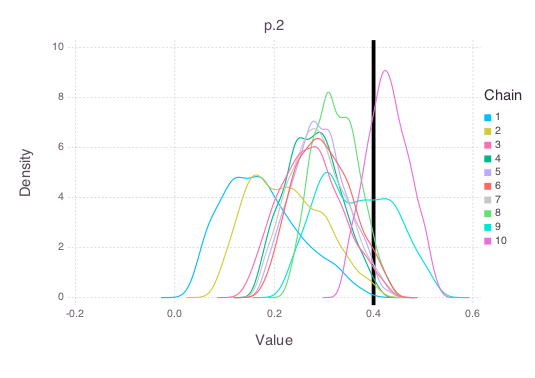

In [11]:
graficos = plot(cadena_summary, [:mean, :density], legend=true);
draw(graficos, ncol = 2, filename="promedios",fmt=:png)

#push!(graficos[2,2].layers, layer(x=linspace(1,10,10),y=rand(10),Geom.line)[1]);
push!(graficos[2,2].layers, layer(xintercept=[0.4], Geom.vline(color = "black", size = [1mm]))[1]);

graficos[2,2]

14-element Array{AbstractString,1}:
 "lp__"         
 "accept_stat__"
 "stepsize__"   
 "treedepth__"  
 "n_leapfrog__" 
 "divergent__"  
 "energy__"     
 "p.1"          
 "p.2"          
 "p.3"          
 "p.4"          
 "p.5"          
 "p.6"          
 "p.7"          

In [10]:
for i in 1:7
   print(i) 
end

1234567

In [259]:
#obtener el promedio de cada p.i por cadenas
cadena_1 = sim[:,["p.1"],1];
cadena_2 = sim[:,["p.1"],2];
cadena_3 = sim[:,["p.1"],3];
cadena_4 = sim[:,["p.1"],4];
cadena_p1 = sim[:,["p.2"],:];
prom = mean(cadena_p1.value)

0.4301722224999999